### **Importing Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import datetime
import math
import seaborn as sns
import matplotlib.pyplot as plt

### **Loading Given Data**

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("input_files/esewa_airlines.csv")

In [4]:
data.head()

,Unnamed: 0,account_id,last_modified_date,travelled_flight_name,total_amount
0,0,1.559470e+19,10/11/2023,BUDDHA AIR,6400.0
1,1,2.693080e+18,10/11/2023,BUDDHA AIR,5200.0
2,2,7.494540e+18,10/11/2023,SHREE AIRLINES,8800.0
3,3,1.493320e+19,10/11/2023,BUDDHA AIR,9001.0
4,4,1.682070e+19,10/11/2023,YETI AIRLINES,23200.0


In [5]:
data.columns

Index(['Unnamed: 0', 'account_id', 'last_modified_date',
       'travelled_flight_name', 'total_amount'],
      dtype='object')

In [6]:
# Removing Extra Columns Came Due To Import
del data['Unnamed: 0']

In [7]:
# Checking columns datatypes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   account_id             1048575 non-null  float64
 1   last_modified_date     1048575 non-null  object 
 2   travelled_flight_name  1048575 non-null  object 
 3   total_amount           1048575 non-null  float64
dtypes: float64(2), object(2)
memory usage: 32.0+ MB


### **Converting Date of type object to datetime**

In [8]:
data.last_modified_date = pd.to_datetime(data.last_modified_date,format='%m/%d/%Y')

In [9]:
# Analyzing top 5 data of dataframe
data.head()

,account_id,last_modified_date,travelled_flight_name,total_amount
0,1.559470e+19,2023-10-11,BUDDHA AIR,6400.0
1,2.693080e+18,2023-10-11,BUDDHA AIR,5200.0
2,7.494540e+18,2023-10-11,SHREE AIRLINES,8800.0
3,1.493320e+19,2023-10-11,BUDDHA AIR,9001.0
4,1.682070e+19,2023-10-11,YETI AIRLINES,23200.0


In [10]:
'''
Checking the unique rows in each columns
'''
data.nunique()

account_id               211509
last_modified_date          479
travelled_flight_name         9
total_amount               4690
dtype: int64

### **Recency**

In RFM (Recency, Frequency, Monetary) analysis, **"Recency"** holds significant importance. It encapsulates the essence of how recently a customer has interacted with a product or service.

- *Recency* essentially measures the freshness of engagement, portraying the time elapsed since the last purchase or interaction. It's a pivotal metric in understanding customer behavior and preferences.
---




In [11]:
'''
Grouping Data by column "account_id" in "last_modified_date"
to get latest login date from each "account_id"
'''
data2 = data.groupby('account_id')['last_modified_date'].max().reset_index()

In [12]:
data2.head()

,account_id,last_modified_date
0,6.630750e+12,2024-04-22
1,9.564960e+12,2024-03-21
2,2.564860e+13,2023-02-15
3,6.785860e+13,2024-04-14
4,7.441550e+13,2023-05-08


In [13]:
'''
Finally the last login date is subtracted from the todays date and
result is stored in "regency columns" in days format
'''
data2['recency']  = data2['last_modified_date'].apply(lambda x : math.floor((datetime.datetime.now()-x).days))

In [14]:
data2.head()

,account_id,last_modified_date,recency
0,6.630750e+12,2024-04-22,71
1,9.564960e+12,2024-03-21,103
2,2.564860e+13,2023-02-15,503
3,6.785860e+13,2024-04-14,79
4,7.441550e+13,2023-05-08,421


## Visualizing the top 20 recency counts from data2, presenting them in a bar plot with enhanced aesthetics using Seaborn

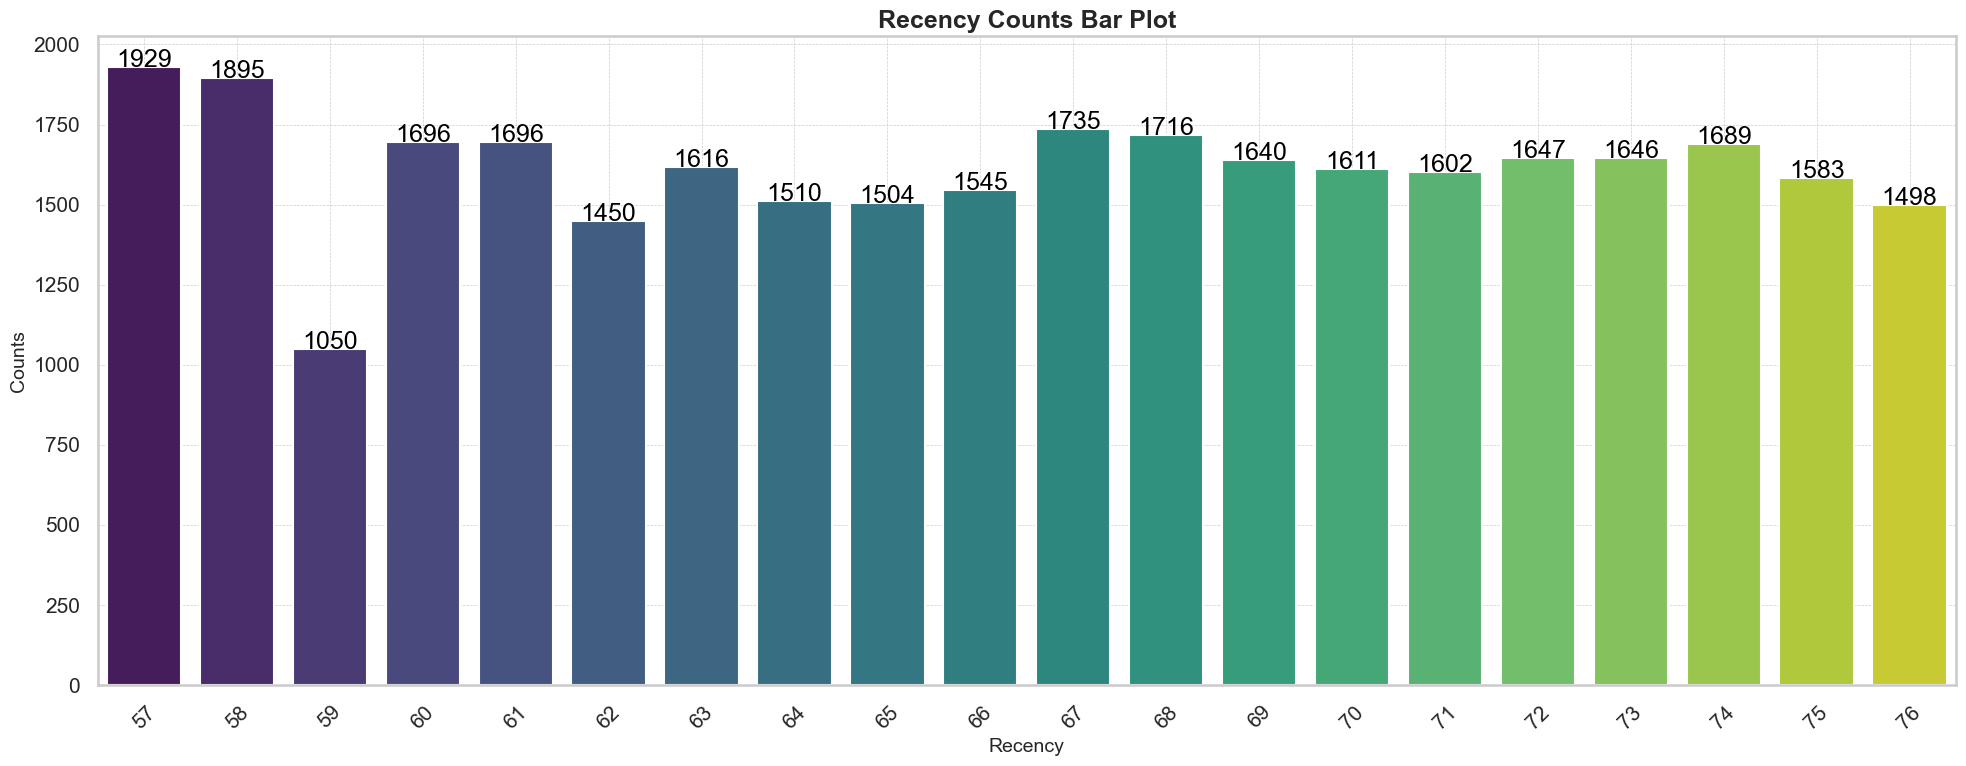

In [15]:
data2_sorted = data2.sort_values(by='recency')
data2_sorted = data2_sorted.reset_index(drop=True)
recency_counts = data2_sorted.groupby('recency').size().reset_index(name='counts')
recency_counts = recency_counts.head(20)
sns.set(style="whitegrid", context="talk")
plt.figure(figsize=(20, 8))
barplot = sns.barplot(x='recency', y='counts', data=recency_counts, palette="viridis")
for index, row in recency_counts.iterrows():
    barplot.text(row.name, row.counts, round(row.counts, 2), color='black', ha="center")
plt.xlabel('Recency', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Recency Counts Bar Plot', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### **Frequency**

**"Frequency"** stands as a pillar of customer engagement assessment. It encapsulates the rhythm of customer interactions with a product or service.

- *Frequency* serves as a beacon illuminating the consistency and regularity of customer engagement. It sheds light on how often a customer interacts, purchases, or engages with the business over a specific period.
---

In [16]:
'''
Grouping Data by column "account_id" in "last_modified_date"
to get count of login from each "account_id"
'''
data_frequency = data.groupby('account_id')['last_modified_date'].count().reset_index()

In [17]:
data_frequency.head()

,account_id,last_modified_date
0,6.630750e+12,2
1,9.564960e+12,1
2,2.564860e+13,2
3,6.785860e+13,1
4,7.441550e+13,1


In [18]:
data_frequency.columns = ["account_number","frequency"]

In [19]:
data_frequency.describe()

,account_number,frequency
count,2.115090e+05,211509.00000
mean,7.872588e+18,4.95759
std,5.115411e+18,10.52478
min,6.630750e+12,1.00000
25%,3.581480e+18,1.00000
50%,7.267880e+18,2.00000
75%,1.173560e+19,6.00000
max,1.844670e+19,1595.00000


In [20]:
'''
Showing the account_number whose frequency of login is greater than 80
'''
data_freq_80 = data_frequency[data_frequency['frequency']>80]

In [21]:
data_freq_80.shape

(332, 2)

In [22]:
data_freq_80.head()

,account_number,frequency
866,5.477190e+16,81
1468,9.398910e+16,88
1875,1.213950e+17,101
2437,1.538570e+17,81
5820,3.700730e+17,104


### **Monetary**

 **"Monetary"** emerges as a cornerstone in understanding customer worth. It embodies the financial dimension of customer engagement, quantifying the value each interaction brings to the business.

- *Monetary* delves into the economic aspect of customer behavior, portraying the monetary significance of each transaction or engagement. It not only considers the amount spent but also discerns patterns of spending behavior, purchase preferences, and potential for future revenue generation.
---

In [23]:
'''
Grouping Data by column "account_id" in "total_amount"
to get total transaction done by "account_id"
'''
data_monetary = data.groupby('account_id')['total_amount'].sum().reset_index()

In [24]:
data_monetary.head()

,account_id,total_amount
0,6.630750e+12,8200.0
1,9.564960e+12,4400.0
2,2.564860e+13,7790.0
3,6.785860e+13,7900.0
4,7.441550e+13,7400.0


### **Creating Final DataFrame with all RFM values**

In [25]:
data2['frequency'] = data_frequency['frequency']
data2['Monetary'] = data_monetary['total_amount']

In [26]:
data2.head()

,account_id,last_modified_date,recency,frequency,Monetary
0,6.630750e+12,2024-04-22,71,2,8200.0
1,9.564960e+12,2024-03-21,103,1,4400.0
2,2.564860e+13,2023-02-15,503,2,7790.0
3,6.785860e+13,2024-04-14,79,1,7900.0
4,7.441550e+13,2023-05-08,421,1,7400.0


### **Finding Valuable Customer From the Given Data**

In [35]:
'''
Getting Customer Who Used Esewa to purchase ticket recently and has used esewa most of the time to purchase tickets.

Note: Threshold assumption is random for both 'regency' and 'frequency'
'''
data_valuable_customer = data2[(data2['recency']<100) & (data2['frequency']>100) & (data2['Monetary']>500000)]

In [36]:
data_valuable_customer

,account_id,last_modified_date,recency,frequency,Monetary
1875,1.213950e+17,2024-04-25,68,101,692884.64
5820,3.700730e+17,2024-05-02,61,104,828376.42
6634,4.193420e+17,2024-05-04,59,122,976079.51
8932,5.723650e+17,2024-05-06,57,1595,11034386.67
10838,6.974150e+17,2024-05-01,62,175,1242944.38
...,...,...,...,...,...
208220,1.802810e+19,2024-04-18,75,109,772341.00
208322,1.804170e+19,2024-05-06,57,114,923748.08
210128,1.827050e+19,2024-05-05,58,338,2837596.70
210595,1.832880e+19,2024-05-03,60,251,1923517.28


In [31]:
'''
Getting Most Valuable Customer
'''
data2.iloc[8932:8933]

,account_id,last_modified_date,recency,frequency,Monetary
8932,5.723650e+17,2024-05-06,57,1595,11034386.67


In [32]:
data['travelled_flight_name'].value_counts()

travelled_flight_name
BUDDHA AIR                        629618
SHREE AIRLINES                    200980
YETI AIRLINES                     170943
SAURYA AIRLINES                    42472
Summit Air                          1917
GUNA AIRLINES                       1388
Nepal Airlines-Domestic Direct       867
TARA AIR                             382
Tara Air                               8
Name: count, dtype: int64